In [1]:
# import libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import dataset
data = pd.read_csv("train.csv")
print(data.head())

    x          y
0  24  21.549452
1  50  47.464463
2  15  17.218656
3  38  36.586398
4  87  87.288984


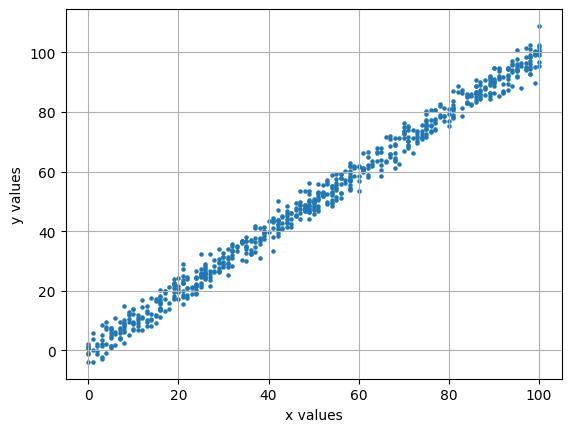

In [5]:
# tampilan grafik
X = data['x']; Y = data['y']
X = X.tolist()
Y = Y.tolist()

plt.scatter(X, Y, s = 5)
plt.grid()
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [7]:
# algoritma gradient descent untuk mencari parameter w dan b yang paling optimal
# w dan b adalah parameter untuk menentukan kemiringan / gradien garis
def gradient_descent(X, Y, w, b, alpha):
  dl_dw = 0.0     # variabel sementara untuk menghitung -1 * X * (Y - (w * X + b))
  dl_db = 0.0     # variabel sementara untuk menghitung -1 * (Y - (w * X + b))
  N = len(X)

  for i in range(N):
    dl_dw += -1*X[i] * (Y[i] - (w*X[i] + b))
    dl_db += -1*(Y[i] - (w*X[i] + b))

  w = w - (1/float(N)) * dl_dw * alpha
  b = b - (1/float(N)) * dl_db * alpha
  return w, b

In [8]:
# fungsi untuk cost function (kesalahan prediksi)
def cost_function (X, Y, w, b):
  N = len(X)
  total_error = 0.0
  for i in range(N):
    total_error += (Y[i] - (w*X[i] - b))**2

  return total_error / (2*float(N))

In [9]:
# menggunakan data training untuk fungsi train
def train(X, Y, w, b, alpha, n_iter):
  for i in range(n_iter):
    w, b = gradient_descent(X, Y, w, b, alpha)
    if i % 400 == 0:
      print ("iteration:", i, "cost: ", cost_function(X, Y, w, b))
  print(f"w: {w} b: {b}")

  return w, b

In [11]:
# prediksi
def predict(x, w, b):
  return x*w + b

 Implementasi Regresi Single Variabel




In [12]:
# hitung nilai w dan b
w, b = train(X, Y, 0.0, 0.0, 0.0001, 7000)

# uji coba prediksi dengan memprediksi nilai y jika x adalah 50
x_new = 50.0
y_new = predict(x_new, w, b)
print("\n\nUji prediksi dengan satu data\n\nnilai y jika x = 50", y_new)

# melengkapi dengan melakukan prediksi untuk seluruh data testing
data_test = pd.read_csv("test.csv")
x_test = data_test['x']
y_test = data_test['y']
y_prediction = list()
n = len(x_test)

for i in range(n):
  y_new = predict(x_test[i], w, b)
  y_prediction.append(y_new)
print("\n\nilai x, nilai prediksi y")

for i in range(n):
  if i%30 == 0:
    print(x_test[i],"     ", y_prediction[i])

iteration: 0 cost:  743.4332672935938
iteration: 400 cost:  3.9352561522452434
iteration: 800 cost:  3.9352370922739954
iteration: 1200 cost:  3.9352228867692007
iteration: 1600 cost:  3.9352133946778873
iteration: 2000 cost:  3.935208478193514
iteration: 2400 cost:  3.935208002687018
iteration: 2800 cost:  3.9352118366393762
iteration: 3200 cost:  3.9352198515754337
iteration: 3600 cost:  3.9352319219992205
iteration: 4000 cost:  3.9352479253304566
iteration: 4400 cost:  3.9352677418424737
iteration: 4800 cost:  3.93529125460133
iteration: 5200 cost:  3.9353183494062476
iteration: 5600 cost:  3.935348914731232
iteration: 6000 cost:  3.9353828416678653
iteration: 6400 cost:  3.93542002386934
iteration: 6800 cost:  3.9354603574955958
w: 0.9991199101984998 b: -0.004709287799856656


Uji prediksi dengan satu data

nilai y jika x = 50 49.951286222125134


ilai x, nilai prediksi y
77       76.92752379748462
99       98.90816182185162
13       12.98384954478064
67       66.93632469549964
64 

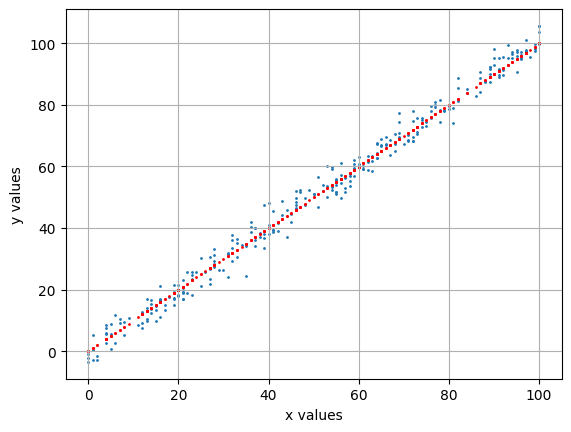

In [13]:
# tampilan grafik data asli dan data prediksi
plt.scatter(x_test, y_test, s = 1)
plt.scatter(x_test, y_prediction, c="Red", s = 1, zorder=1)
plt.grid()
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [14]:
for i in range(len(y_test)):
  error = (y_test[i] - abs(y_prediction[i]))**2

mse = error / len(y_test)

mse = np.mean((y_test - y_prediction)**2)

print("Mean squared error (MSE): ", mse)
print("Root mean squared error (RMSE) :", math.sqrt(mse))

Mean squared error (MSE):  9.452835978235315
Root mean squared error (RMSE) : 3.074546467080196


In [15]:
sum = 0

for i in range(0, 1000):
  sum = sum + i

print(sum)

499500
